# U.S. Medical Insurance Costs

## About this project
This project is part of the Data Analyst Certificate program in CodeAcademy. The goal of the project is to use the Python skills we've been learning and apply them to an open-ended project using real data.

At this point in the program we have not covered numpy or pandas so I will not use those tools to analyze the data for this project.

## Investigating the data
The data for this project is stored in a csv file called insurance.csv. Lets take a look at what is inside the file.

### What fields are in the file?
First lets look at the field names and the first few rows of data

In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
# The first row will contain the fields in the file
with open('insurance.csv') as insurance_file:
    reader = csv.reader(insurance_file)
    
    for x in range(5):
        print(next(reader))

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']
['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523']
['28', 'male', '33', '3', 'no', 'southeast', '4449.462']
['33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061']


So it looks like we have 7 fields, for information about an individual including:
* Age (*age* - int)
* Sex (*sex* - female/male)
* BMI (*bmi* - float)
* Number of children (*children* - int)
* Whether they are a smoker or not (*smoker* - yes/no)
* The region in the US they come from (*region* - southwest, southeast, northwest, etc.)
* The amount they pay in insurance costs - presumably annually? (*charges* - float)

### How many rows are in the file?
How many rows are in the file.

In [3]:
count = 0
for line in open('insurance.csv'): count += 1

print("There are {} lines in the file.".format(count))

There are 1339 lines in the file.


### Are there any non-binary genders in the dataset?
One question I have is whether there are any values for sex beyond "male" and "female".

In [4]:
# Lets get all of the unique values for sex
possible_sexes = []

with open('insurance.csv') as insurance_file:
    csv_reader = csv.DictReader(insurance_file)
        
    for line in csv_reader:
        if line['sex'] not in possible_sexes:
            possible_sexes.append(line['sex'])

print('The values for sex in the data set include:')
for sex in possible_sexes:
    print('- {}'.format(sex))


The values for sex in the data set include:
- female
- male


### What are the possible regions in the dataset?
Another question I have is what the names of all of the regions are.

In [5]:
# Lets get all of the unique values for region
possible_regions = []

with open('insurance.csv') as insurance_file:
    csv_reader = csv.DictReader(insurance_file)
    
    for line in csv_reader:
        if line['region'] not in possible_regions:
            possible_regions.append(line['region'])

print('The values for region in the data set include:')
for region in possible_regions:
    print('- {}'.format(region))

The values for region in the data set include:
- southwest
- southeast
- northwest
- northeast


### Are there any null vales i the dataset?
One last question I have about the data is if there are any null values in the data set that we are going to have to deal with later.

In [6]:
"""
We will start with a simple check to see if a value of None is 
found in any of the fields (meaning that there is a null value)
"""
with open('insurance.csv') as insurance_file:
    reader = csv.reader(insurance_file)
    
    csv_reader = csv.DictReader(insurance_file)
    
    for line in csv_reader:
        for field_value in line:
            if field_value == None:
                print('None found')

## What do we want to find out about the data set?
For this project I would like to find out which factor(s) have the biggest impact on insurance cost.

I'd also like to know if any of the other factors are unduly affected by regionality.

Some other basic questions include:
* What is the average age of patients in the data set?
* Where are the majority of the individuals from?
* What is the average age for someone who has at least one child in the dataset?
* Are there a similar proportion of males to females?
* Is there a similar proportion of people in ages in 10 year buckets?

### InsuranceData class
We don't want to have to keep writing functional code for interacting with the data set.

In [2]:
class InsuranceData:
    """
    Class for managing insurance data from file insurance.csv.
    This class will let us manage the analyze the data from one place
    """
    csv_reader = None
    ages = []
    regions = []
    sex = []
    children = []
    ages_of_people_with_children = []
    age_buckets = {10: '0-10',
                   20: '11-20',
                   30: '21-30',
                   40: '31-40',
                   50: '41-50',
                   60: '51-60',
                   70: '61-70',
                   80: '71-80',
                   90: '81-90',
                   100: '91-100'}
    people_by_region = {}
    people_by_sex = {}
    people_by_bucket = {}
    percentage_by_bucket = {}
    
    def __init__(self):
        with open('insurance.csv') as insurance_file:
            reader = csv.reader(insurance_file)
        
            self.csv_reader = csv.DictReader(insurance_file)
        
            for line in self.csv_reader:
                num_children = int(line['children'])
                age = int(line['age'])
                
                self.ages.append(age)
                self.regions.append(line['region'])
                self.sex.append(line['sex'])
                self.children.append(num_children)
                
                if num_children > 0:
                    self.ages_of_people_with_children.append(age)
                
                for bucket_threshold, bucket_label in self.age_buckets.items():
                    if age <= bucket_threshold:
                        if bucket_label in self.people_by_bucket:
                            self.people_by_bucket[bucket_label] += 1
                        else:
                            self.people_by_bucket[bucket_label] = 1
                            
                        break
                        
    
    def get_average_age(self):
        # Get the average age of all people in the data set
        return sum(self.ages) / len(self.ages)
    
    def get_counts_by_region(self):
        # Get the number of people from each region
        self.people_by_region = {i:self.regions.count(i) for i in self.regions}
        
        return self.people_by_region
    
    def get_number_of_records(self):
        # Get the total number of records
        return len(self.ages)
    
    def get_average_age_of_people_with_children(self):
        # Get the average age of people who have at least one child
        return sum(self.ages_of_people_with_children) / len(self.ages_of_people_with_children)
    
    def get_number_of_people_with_children(self):
        # Get the number of people who have children
        return len(self.ages_of_people_with_children)
    
    def get_counts_by_sex(self):
        # Get the number of people per sex
        self.people_by_sex = {i:self.sex.count(i) for i in self.sex}
        
        return self.people_by_sex
    
    def get_counts_by_age_bucket(self):
        # Gets the number of people in each age bucket
        return self.people_by_bucket
    
    def get_proportion_by_age_bucket(self):
        # Gets the percentage of people in each age bucket
        self.get_counts_by_age_bucket()
        
        for bucket_label, people_in_bucket in self.people_by_bucket.items():
            self.percentage_by_bucket[bucket_label] = (people_in_bucket / len(self.ages)) * 100
        
        return self.percentage_by_bucket
        

In [3]:
# Instantiate an Insuranceobject to work with insurance data
insurance_data = InsuranceData()

### What is the average age of people in the data set?
We want to know the average age of all people.

In [86]:
# Get average age of people in the data set and compare to min and max values
average_age_of_people = insurance_data.get_average_age()

print("The average age of people in the data set is {}.".format(average_age_of_people))
print("The minimum age of people in the data set is {}.".format(min(insurance_data.ages)))
print("The maximum age of people in the data set is {}.".format(max(insurance_data.ages)))

The average age of people in the data set is 39.20702541106129.
The minimum age of people in the data set is 18.
The maximum age of people in the data set is 64.


Based on the data we need to be careful not to make any assumptions about insurance costs of people under 18 or over 64.

### Where are the majority of people from?
We want to know where the majority of people come from.

In [85]:
# Figure out how many records total, and how many people per region
people_per_region = insurance_data.get_counts_by_region()
total_number_of_records = insurance_data.get_number_of_records()

print(people_per_region)
print(total_number_of_records)

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
1338


The majority of people come from the southeast. 364 people out of a total of 1338 (about 27%) are from there. Overall the distribution of people per region is pretty equal.

### What is the average age of someone with at least one child?
We were curious about the average age of people with children. This might be relevant in determining on how much of a factor having a child is on cost, vs age.

In [92]:
# Figure out how many records total, and average age of people with one child
average_age_of_people_with_children = insurance_data.get_average_age_of_people_with_children()
total_number_of_people_with_children = insurance_data.get_number_of_people_with_children()

print("The average age of people with children is {}. There are {} people with children.".format(average_age_of_people_with_children, total_number_of_people_with_children))

The average age of people with children is 39.78010471204188. There are 764 people with children.


Based on our previous analysis, the average age of people with children is about half a year older than the overall average. A bit more than half of the people in the data set have at least one child.

### Are there similar proportions of males to females?
We want to know if the number of males is similar to the number of females.

In [95]:
people_per_sex = insurance_data.get_counts_by_sex()

print(people_per_sex)

{'female': 662, 'male': 676}


Based on previous analysis, the percentage of females is about 49.5% and the percentage of males is about 50.5%.

### Is there a similar proportion of people in ten year buckets of ages?
Is there a fairly even distribution of ages across the data set?

In [6]:
people_per_age_bucket = insurance_data.get_counts_by_age_bucket()
print(people_per_age_bucket)

percentage_per_age_bucket = insurance_data.get_proportion_by_age_bucket()
print(percentage_per_age_bucket)

{'11-20': 166, '21-30': 278, '31-40': 257, '41-50': 281, '51-60': 265, '61-70': 91}
{'11-20': 12.406576980568012, '21-30': 20.777279521674142, '31-40': 19.20777279521674, '41-50': 21.00149476831091, '51-60': 19.805680119581464, '61-70': 6.801195814648729}


Based on the data the proportion of ages looks like:
* 11-20: 12.41%
* 21-20: 20.78%
* 31-40: 19.21%
* 41-50: 21.00%
* 51-60: 19.81%
* 61-70: 6.80%

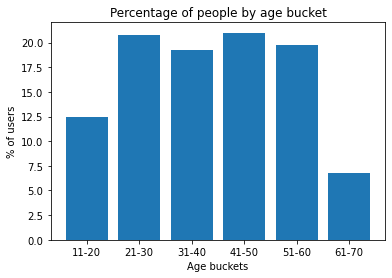

In [7]:
# Plot the percentage of people by age bucket
plt.bar(percentage_per_age_bucket.keys(), percentage_per_age_bucket.values())
plt.xlabel('Age buckets')
plt.ylabel('% of users')
plt.title('Percentage of people by age bucket')
plt.show()

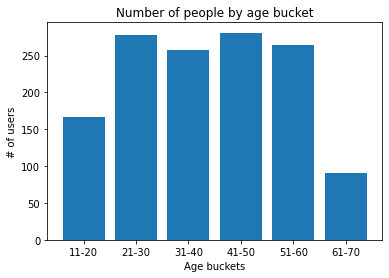

In [8]:
# Plot the number of people by age bucket
plt.bar(people_per_age_bucket.keys(), people_per_age_bucket.values())
plt.xlabel('Age buckets')
plt.ylabel('# of users')
plt.title('Number of people by age bucket')
plt.show()